In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [ ]:
#signal.firwin? # design a filter
#signal.freqz? # look at the frequency response of the filter

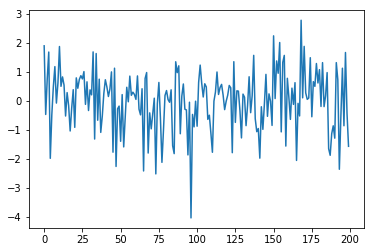

In [2]:
# let's create a random timeseries (gaussian white noise)
timeseries = np.random.randn(10000)
plt.plot(timeseries[:200])

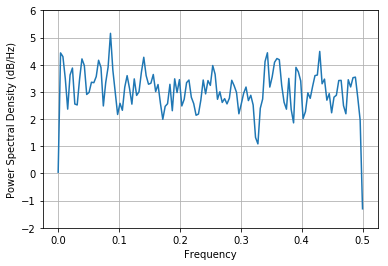

In [4]:
# and look at its power spectrum (basically flat, just noise)
plt.psd(timeseries, Fs=1.0);

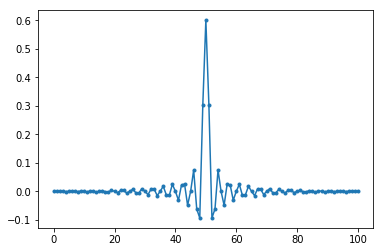

In [22]:
# let's design a filter for this timeseries that cuts off frequencies above 0.3
numtaps = 101
lowpass_p3 = signal.firwin(numtaps, 0.3, nyq=0.5)

# first let's just look at the filter by plotting it
plt.plot(lowpass_p3, '.-')

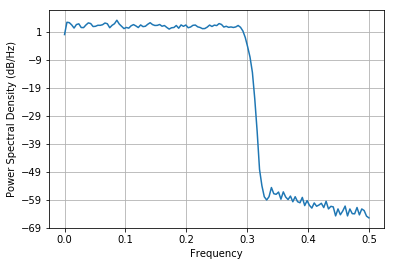

In [23]:
# let's filter (aka convolve) our timeseries with the low-pass filter
lowpass_timeseries = np.convolve(timeseries, lowpass_p3, 'same')

# and then look at the power spectrum of the result
# this time it tapers off sharply at a frequency of about 0.3 -- success!
plt.psd(lowpass_timeseries, Fs=1.0);

(0, 100)

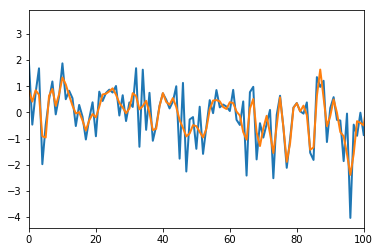

In [21]:
# let's compare the low-pass filtered (orange) and original (blue) timecourses
# you can see that the filtered curve is kind of like a smoothed version of the original
plt.plot(timeseries, lw=2)
plt.plot(lowpass_timeseries, lw=2)
plt.xlim(0, 100)

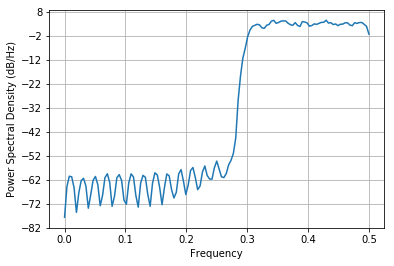

In [24]:
# now we can create a high-pass version by subtracting the low-pass timecourse from the original
highpass_p3 = timeseries - lowpass_timeseries

# its power spectrum only has high power ABOVE frequencies of ~0.3 -- success!
plt.psd(highpass_p3, Fs=1.0);

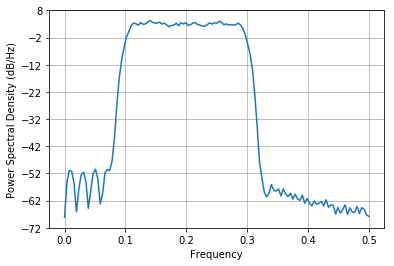

In [26]:
# finally, to get a bandpass filter we can create a second low-pass filter, this time at freq. 0.1
# then apply that to the high-pass filtered timeseries
lowpass_p1 = signal.firwin(numtaps, 0.1, nyq=0.5)
highpass_timeseries = lowpass_timeseries - np.convolve(timeseries, lowpass_p1, 'same')
plt.psd(highpass_timeseries, Fs=1.0);

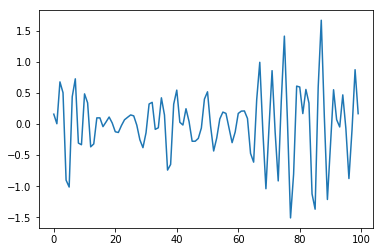

In [27]:
plt.plot(highpass_timeseries[:100])

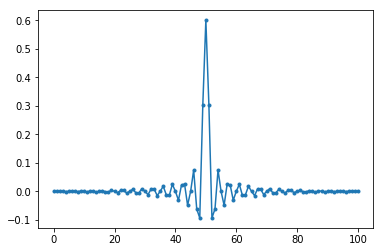

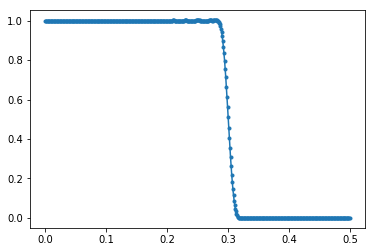

In [18]:
# let's take another look at the frequency response of our filter

ntaps_test = 101 # change this number to see the effect
lowpass = signal.firwin(ntaps_test, 0.3, nyq=0.5)

# plot the filter
plt.plot(lowpass, '.-')


# freqz computes the "frequency response" of the filter
# this basically shows what effect the filter will have on the spectrum of your signal
w, h = signal.freqz(lowpass)

# freqz "frequency" values are in units of radians/time (instead of cycles/time), so we need to divide by 2*pi
# to get the same frequency units that we're used to
plt.figure()
plt.plot(w / (2*np.pi), np.abs(h), '.-')